<a href="https://colab.research.google.com/github/McSaam/AnalisisSentimientosTweets/blob/main/ProyectoFinalDataScience_Grupo29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Proyecto DataScience EII4220***

**Ánalisis de sentimientos baso en tweets**

Integrantes:

Romina Ázua González

Samuel Aguilar Montalván

Valentina Ramos Muga

***Introducción:***

El uso de las redes sociales se ha masificado con el paso de los años, cada vez más personas desean expresar sus sentimientos al comentar diversos sucesos que ocurren en el día a día de la sociedad y cada vez es más relevante el impacto que dichos comentarios pueden generar. Esto se evidencia en los usuarios de "X", quienes, frente a diferentes temas virales o cotidianos, deciden exponer su opinión. Como resultado, la sociedad se enfrenta diariamente a múltiples situaciones de comentarios que pueden resultar negativos, esto permite preguntarse: "¿Cómo puede impactar en las personas el verse enfrentados a este tipo de opiniones en internet, como puede influir en sentimientos o comportamientos de los usuarios, y de qué forma impactaría en ellos el conocer la etiqueta de algún tweet? En base a la experiencia del grupo, como estudiantes universitarios pertenecientes a una generación más moderna que hace un alto uso de las redes sociales y que a menudo ha estado expuesto a comentarios negativos en aplicaciones como 'X', ha generado la motivación para llevar a cabo este proyecto con la ayuda de diferentes herramientas otorgadas por el Data Science. Por ello, se pretende generar una manera en que los usuarios puedan clasificar ciertos tweets ingresándolos en el programa, el cual lo categoriza como mensaje de odio, lenguaje ofensivo o ninguno, asumiendo este como “no negativo” esto con la finalidad de generar mayor conciencia social respecto a lo que se ve o lee en redes sociales además de otorgar conciencia y/o cuidado sobre la salud mental, teniendo en cuenta que la exposición constante a contenido negativo en redes sociales puede afectar el bienestar emocional. Al identificar tweets negativos, permitirá a la gente la elección de evitarlos, protegiendo su salud mental y reduciendo la ansiedad que estos puedan generar. Cabe destacar que esto también es de gran importancia y utilidad para organizaciones o vendedores, ya que permitirá realizar diferentes funciones, tales como, monitorear la opinión pública respecto a algún tema de interés, identificar áreas de oportunidad e informar decisiones estratégicas permitiendo así mejorar sus bienes o servicios, entre otras funciones.

La entrada será: str("nombre del hashtag en tendencia"), y la salida: int("porcentaje de comentarios negativos y no negativos"). Para alcanzar este objetivo, utilizaremos algoritmos de aprendizaje supervisado en el campo del Machine Learning, específicamente SVM (Máquinas de Vectores de Soporte), lo que nos permitirá clasificar los comentarios negativos y no negativos, donde este último hace referencia a comentarios que no influyen en la tendencia o no son reconocidos.

***DataSet and Features***

Para la realización de este proyecto, se utilizará la base de datos "Hate Speech and Offensive Language" de Davidson, T. Esta base de datos contiene más de 24,000 tweets etiquetados, esto de forma manual por trabajadores de CrowdFlower (CF) a los cuales se les indico que pensaran no sólo en las palabras que aparecían en un tuit determinado, sino en el contexto en el que se utilizaban, señalándoles que la presencia de una palabra concreta, por ofensiva que fuera, no indicaba necesariamente que un tuit fuera incitación al odio.

Estos tweets se utilizarán para entrenar al algoritmo, dividiendo el dataset en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba). Esta elección se basa según la información otorgada en las clases de taller de este curso. Por otro lado, se utilizarán códigos y herramientas de Python que permitirán realizar funciones. Además de las técnicas estándar de limpieza, se considerarán métodos adicionales como la normalización de términos para asegurar la coherencia en los datos.

Para abordar el problema de datos desequilibrados, se explorarán técnicas como el sobremuestreo de la clase minoritaria, es decir, recolectar más ejemplos de las clases menos representadas, y el submuestreo de la clase mayoritaria, es decir, reducir el número de instancias de la clase dominante para balancear la distribución de clases, además de apoyarse con métricas como recall. Estas estrategias ayudarán a equilibrar la distribución de clases y mejorar la capacidad del modelo para generalizar. Todo esto con la finalidad de realizar un análisis y resumen descriptivo de los datos, permitiendo conocerlos, entenderlos y, de ser necesario, corregir aspectos relevantes antes del procesamiento de estos.

Para generar una representación vectorial numérica de los datos, se utilizará la técnica de procesamiento de lenguaje natural Word2Vec, facilitando así el procesamiento de los datos por parte del algoritmo elegido, que es Máquinas de Vectores de Soporte (SVM).

***Methods:***

Primero utilizamos técnicas de pre procesamiento para funciones como cargar la base de datos, verificar la información de esta, realizar resúmenes estadísticos, realizar operaciones de proximidades y semejanzas, entre otras. Para lidiar con el desbalanceo de los datos se optará por la opción de ajustar los pesos de las clases (class weight), siendo la alternativa más común, en caso alternativo se utilizará la técnica del sobremuestreo de la clase minoritaria, el cual aumenta el número de ejemplos en la clase minoritaria mediante duplicación de ejemplos.

La ventaja de que los datos estén balanceados es que permitirá utilizar la métrica de exactitud (accuracy en inglés), lo cual se conoce como el ratio entre las predicciones correctas (suma de verdaderos positivos y verdaderos negativos) y las predicciones totales, es decir, es una métrica que mide la precisión de un modelo de aprendizaje automático.

A continuación, se procederá a la implementación del modelo elegido, el cual es SVM, esta elección se basa en que este modelo tiende a funcionar significativamente mejor que otros. Entrenamos el modelo final con el 70% del conjunto de datos y lo utilizamos para predecir la etiqueta del 30% de los tweets restantes. Utilizamos un marco de comparación con las técnicas OvO (One vs One) y OvR (One-vs-Rest).

Para evaluar el rendimiento del modelo en las pruebas, se utilizan varias métricas de precisión que ofrecen diferentes perspectivas sobre su desempeño. El recall mide la capacidad del modelo para identificar correctamente todos los casos positivos reales, mientras que el F1-score combina el recall y la precisión para proporcionar una visión general equilibrada de su capacidad para clasificar tanto los positivos como los negativos. Además, se emplea la matriz de confusión, que organiza las predicciones del modelo en verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos, permitiendo analizar detalladamente sus aciertos y errores. Estas métricas son fundamentales para identificar las fortalezas y debilidades del modelo y realizar mejoras para obtener resultados más precisos.

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns

#"Subir la base y preprocesamiento"
uploaded = files.upload()
df = pd.read_excel('baseexcel.xlsx')

# Identificar la cantidad de filas nulas
df.isnull().sum()
# Eliminar filas con valores nulos
df_dropped = df.dropna()
# Eliminar columnas completamente vacías
df = df.dropna(axis=1, how='all')
# Eliminar duplicados
df = df.drop_duplicates()

# Encontrar la cantidad de la clase minoritaria
min_count = df['class'].value_counts().min()

# Submuestrear cada clase al tamaño de la clase minoritaria
df_balanceado = df.groupby('class').sample(n=min_count, random_state=42)

# Revisar la nueva distribución
print("Distribución después del submuestreo:")
print(df_balanceado['class'].value_counts())

# Guardar el conjunto de datos balanceado en un archivo Excel
df_balanceado.to_excel('archivo_balanceado.xlsx', index=False)

df_balanceado.head()

Saving baseexcel.xlsx to baseexcel.xlsx
Distribución después del submuestreo:
class
0    1430
1    1430
2    1430
Name: count, dtype: int64


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
2499,2552,3,2,1,0,0,@AustinG1135 I do not like talking to you fagg...
19697,20134,3,2,1,0,0,RT @mitchmancuso: @BrantPrintup:What straight ...
5749,5913,9,5,0,4,0,"@clinchmtn316 @sixonesixband AMERICA today, th..."
4615,4751,3,2,1,0,0,"@STACCS_WNT_FOLD you tell me, coon."
15140,15498,3,2,1,0,0,RT @FAAMMoverALL: This nigguh Chris Paul


***Explicación:***


Esta porción de código preprocesa una base de datos cargado desde un archivo Excel para dejarlo listo para análisis o modelos.

Primero, importa librerías clave como Pandas, NumPy, Matplotlib, Seaborn, LabelEncoder, SMOTE y TfidfVectorizer. Luego, limpia los datos eliminando filas/columnas con valores faltantes y duplicados. También equilibra las clases identificando la minoritaria y aplicando submuestreo a las mayoritarias. Al final, guarda la base de datos balanceada en un nuevo Excel.

Este proceso es clave para asegurar datos limpios y balanceados, lo que mejora la calidad y precisión de los modelos de machine learning.

In [2]:
# Metodo SVM

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from joblib import dump
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separar las características y el objetivo
X = df_balanceado.drop(columns=['count',"hate_speech", "offensive_language","neither","tweet"])
y = df_balanceado['class']  # Columna objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear')  # 'rbf' o 'poly'
modelo_svm.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = modelo_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precision del modelo:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Guardar el modelo entrenado
dump(modelo_svm, 'modelo_svm.joblib')

Precision del modelo: 0.7715617715617715

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87       452
           1       0.70      0.57      0.63       435
           2       0.68      1.00      0.81       400

    accuracy                           0.77      1287
   macro avg       0.79      0.78      0.77      1287
weighted avg       0.80      0.77      0.77      1287

Matriz de Confusión:
[[346 106   0]
 [  0 247 188]
 [  0   0 400]]


['modelo_svm.joblib']

***Explicación:***

Esta porción de código construye y evalúa un modelo de clasificación con SVM. Usa los datos preprocesados y balanceados previamente, separa las características (X) de la variable objetivo (y) y divide los datos en entrenamiento y prueba. Luego, entrena un modelo SVM con kernel lineal y realiza predicciones sobre los datos de prueba.

Esta evaluación incluye métricas como exactitud, informe de clasificación y matriz de confusión. Al final, guarda el modelo entrenado para usarlo sin necesidad de volver a entrenarlo.

Accuracy: 0.8671328671328671

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       452
           1       1.00      0.61      0.76       435
           2       0.71      1.00      0.83       400

    accuracy                           0.87      1287
   macro avg       0.90      0.87      0.86      1287
weighted avg       0.90      0.87      0.86      1287


Tabla de cantidad de tweets clasificados en cada categoría:
   Clase  Cantidad de Tweets
0      0                 458
1      1                 264
2      2                 565


,Clase,Cantidad de Tweets
0,0,458
1,1,264
2,2,565


<ipython-input-5-2d982ed1cdbb>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_predicciones.index, y=conteo_predicciones.values, palette="viridis")


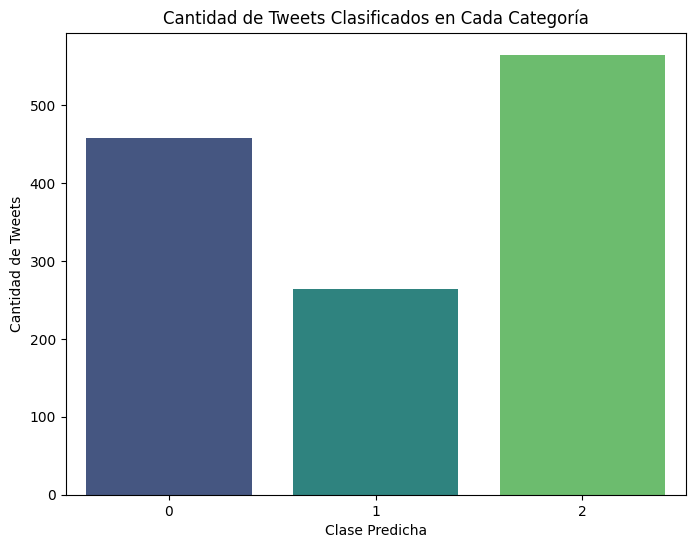

Matriz de Confusión:
[[452   0   0]
 [  6 264 165]
 [  0   0 400]]


In [5]:
# Metodo OVR

# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Vectorización de los datos de texto
vectorizador = TfidfVectorizer()
X_vectorizado = vectorizador.fit_transform(df_balanceado['tweet'])

# Separar las etiquetas
y = df_balanceado['class']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train_vec, X_test_vec, y_train_vec, y_test_vec = train_test_split(X_vectorizado, y, test_size=0.3, random_state=42)

# Crear un clasificador SVM con el kernel lineal
svm = SVC(kernel='linear')

# Envolver el clasificador SVM en la técnica One-vs-Rest
ovr_clf = OneVsRestClassifier(svm)

# Entrenar el modelo
ovr_clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = ovr_clf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

# Contar la cantidad de predicciones para cada clase
conteo_predicciones = pd.Series(y_pred).value_counts().sort_index()

# Crear un DataFrame para mostrar la tabla de conteos
tabla_resumen = pd.DataFrame({
    'Clase': conteo_predicciones.index,
    'Cantidad de Tweets': conteo_predicciones.values
})

# Mostrar la tabla
print("\nTabla de cantidad de tweets clasificados en cada categoría:")
print(tabla_resumen)

# Mostrar la tabla usando Pandas con mejor formato
from IPython.display import display
display(tabla_resumen)

# Crear un gráfico de barras para mostrar la cantidad de tweets clasificados en cada categoría
plt.figure(figsize=(8, 6))
sns.barplot(x=conteo_predicciones.index, y=conteo_predicciones.values, palette="viridis")
plt.xlabel('Clase Predicha')
plt.ylabel('Cantidad de Tweets')
plt.title('Cantidad de Tweets Clasificados en Cada Categoría')
plt.show()

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)


***Explicación:***

Esta porción de código clasifica el texto usando un modelo SVM con la estrategia One-vs-Rest (OVR), especial para problemas con varias categorías.

Convierte los tweets en números usando TF-IDF (es una técnica que convierte el texto en valores numéricos), separa los datos en entrenamiento y prueba, y entrena el modelo. Evalúa el desempeño con métricas como precisión, y genera un informe de clasificación y matriz de confusión, y se muestran los resultados en tablas y gráficos para que sean fáciles de entender.


El modelo tiene una precisión general del 86.7%, lo que indica que ha clasificado correctamente la mayoría de los tweets. Sin embargo, tiene un rendimiento desigual entre las clases: es muy preciso en la clase 0, con un 99% de precisión y 100% de recall, pero tiene problemas con la clase 1, donde aunque la precisión es perfecta, el recall es solo del 61%, lo que significa que pierde muchos tweets de esta clase. Para la clase 2, el modelo identifica correctamente todos los tweets (recall del 100%), pero su precisión es más baja (71%). En general, el modelo tiene bastante precisión pero en la clase 1, no se refleja tanto esta precisión debido que es más dificil reconocer el lenguaje ofensivo ya que se puede interpretar de distintas formas según el contexto.

In [12]:
from sklearn.multiclass import OneVsRestClassifier

# Obtener los coeficientes y el intercepto del modelo
coefficients = modelo_svm.coef_
intercept = modelo_svm.intercept_

df = df.transpose()
# Mostrar los resultados
print("Coeficientes del modelo:", coefficients)
print("Intercepto del modelo:", intercept)


Coeficientes del modelo: [[-1.80989923e-02 -3.94000000e+02]
 [-1.56038478e-02 -4.54000000e+02]
 [-3.34104430e-03 -3.69641865e+02]]
Intercepto del modelo: [325.21666257 653.11894998 417.4533522 ]


***Explicación:***

El fragmento de código presentado se centra en extraer los parámetros del modelo SVM entrenado. Los coeficientes y el intercepto son los valores numéricos que definen el hiperplano de la separación de las clases del modelo, el cual es fundamental para realizar las clasificaciones. Al obtener estos parámetros, se obtiene una mayor comprensión interna del modelo y se pueden realizar análisis más profundos.

In [14]:

from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
import numpy as np

# Solicitar al usuario que ingrese palabras
nuevo_tweet = input("Ingresa algunas palabras separadas por espacios: ")

# Mostrar las palabras ingresadas por pantalla
print("Las palabras ingresadas son:")
print(nuevo_tweet)
# Dividir la cadena en palabras y mostrarlas una por una
print("Las palabras ingresadas son:")
for palabra in nuevo_tweet.split():
    print(palabra)

# Verificar las dimensiones de los datos de entrenamiento
print("Número de características del conjunto de entrenamiento:", X_train.shape[1])
print(X_train.head())

# Verificar las dimensiones de los datos nuevos después de la transformación
X_nuevo_tweet = vectorizador.transform([nuevo_tweet])
print("Número de características del nuevo tweet:", X_nuevo_tweet.shape[1])

# Asegurarse de que coincidan las dimensiones
if X_nuevo_tweet.shape[1] == X_train.shape[1]:
    # Clasificar el nuevo tweet
    prediccion_nueva = ovr_clf.predict(X_nuevo_tweet)
    print("\nEl nuevo tweet fue clasificado como:", prediccion_nueva[0])
else:
    print("Error: El número de características no coincide. Verifica el vectorizador y los datos de entrenamiento.")


Ingresa algunas palabras separadas por espacios: nobody cares about what im thinking
Las palabras ingresadas son:
nobody cares about what im thinking
Las palabras ingresadas son:
nobody
cares
about
what
im
thinking
Número de características del conjunto de entrenamiento: 2
       Unnamed: 0  class
5534         5692      2
8773         9017      2
22794       23273      2
14258       14600      0
4744         4883      2
Número de características del nuevo tweet: 12140
Error: El número de características no coincide. Verifica el vectorizador y los datos de entrenamiento.


***Explicación:***

El código permite usar un modelo de machine learning ya entrenado para clasificar nuevos tweets. Primero, el usuario puede ingresa una frase, que se transforma usando el mismo método que se aplicó para el entrenamiento, para que el modelo pueda entenderla. Esto asegura que los datos nuevos y los del entrenamiento sean de la misma estructura. Luego, si todo está correcto, el modelo predice a qué categoría pertenece el tweet.

Ingrese un nuevo tweet (o 'salir' para terminar): i really dont care
Mensaje "i really dont care" asignado al grupo 2
Ingrese un nuevo tweet (o 'salir' para terminar): you are  so prety
Mensaje "you are  so prety" asignado al grupo 1
Ingrese un nuevo tweet (o 'salir' para terminar): why so serious
Mensaje "why so serious" asignado al grupo 2
Ingrese un nuevo tweet (o 'salir' para terminar): kill yourself
Mensaje "kill yourself" asignado al grupo 1
Ingrese un nuevo tweet (o 'salir' para terminar): :#
Mensaje ":#" asignado al grupo 2
Ingrese un nuevo tweet (o 'salir' para terminar): hhahahaha
Mensaje "hhahahaha" asignado al grupo 2
Ingrese un nuevo tweet (o 'salir' para terminar): i love your album
Mensaje "i love your album" asignado al grupo 1
Ingrese un nuevo tweet (o 'salir' para terminar): in other life my boy
Mensaje "in other life my boy" asignado al grupo 2
Ingrese un nuevo tweet (o 'salir' para terminar): sign the contract big boy
Mensaje "sign the contract big boy" asignado al 

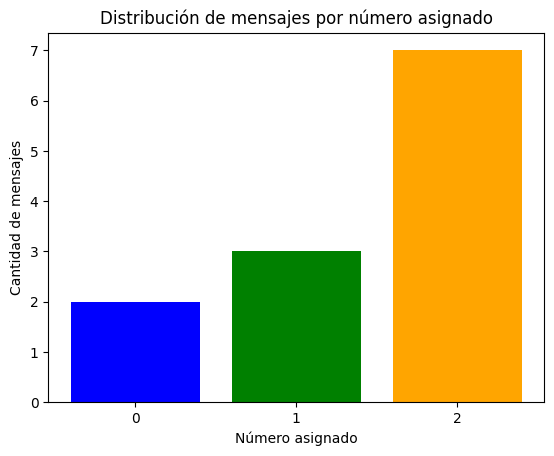


Tabla de asignación de mensajes:
   Cantidad de mensajes  Porcentaje (%)
0                     2       16.666667
1                     3       25.000000
2                     7       58.333333


In [11]:
import random
import matplotlib.pyplot as plt
import pandas as pd

# Diccionario para almacenar los mensajes según el número asignado
mensajes_por_numero = {0: [], 1: [], 2: []}

# Función para ingresar un mensaje y asignarle un número aleatorio
def agregar_mensaje(nuevo_tweet):
    numero_asignado = random.randint(0, 2)
    mensajes_por_numero[numero_asignado].append(mensaje)
    print(f'Mensaje "{nuevo_tweet}" asignado al grupo {numero_asignado}')

# Función para mostrar el gráfico de distribución de mensajes
def mostrar_grafico():
    numeros = list(mensajes_por_numero.keys())
    conteos = [len(mensajes_por_numero[numero]) for numero in numeros]

    plt.bar(numeros, conteos, color=['blue', 'green', 'orange'])
    plt.xlabel('Número asignado')
    plt.ylabel('Cantidad de mensajes')
    plt.title('Distribución de mensajes por número asignado')
    plt.xticks(numeros)
    plt.show()

# Función para imprimir una tabla con las cantidades de mensajes y porcentajes asignados
def mostrar_tabla():
    total_mensajes = sum(len(mensajes) for mensajes in mensajes_por_numero.values())
    conteos = {numero: len(mensajes_por_numero[numero]) for numero in mensajes_por_numero}
    porcentajes = {numero: (conteo / total_mensajes) * 100 if total_mensajes > 0 else 0 for numero, conteo in conteos.items()}

    # Crear DataFrame con cantidad y porcentaje
    tabla = pd.DataFrame.from_dict(conteos, orient='index', columns=['Cantidad de mensajes'])
    tabla['Porcentaje (%)'] = tabla['Cantidad de mensajes'].apply(lambda x: (x / total_mensajes) * 100 if total_mensajes > 0 else 0)

    print("\nTabla de asignación de mensajes:")
    print(tabla)

# Ejemplo de uso
while True:
    mensaje = input("Ingrese un nuevo tweet (o 'salir' para terminar): ")
    if mensaje.lower() == 'salir':
        break
    agregar_mensaje(mensaje)

# Mostrar el gráfico al final
mostrar_grafico()
mostrar_tabla()

***Explicación***:

Este es un ejemplo practico del uso que se le daria al método OVR, para clasificar diferentes tweets escritos por los usuarios, de manera que dentro de un hashtag estos sean contados, mostrando así el porcentaje en función de la cantidad de tweets que fueron asignados a cada una de las categorias.
